# VVV Machine Analysis Samples size 20k

In [1]:
% matplotlib inline

import time
import pandas as pd

from IPython import display as d

import seaborn as sns
sns.set()

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from libs import container
from libs.experiment import (
    WithAnotherExperiment, KFoldExperiment, roc, 
    discretize_classes, clean_features)

## 1. Load Data

In [2]:
start = time.time()

path = "/home/data/carpyncho/stored/samples/"
data = container.read(path)

print("Removing b220...")
del data["b220"]

Loading '/home/data/carpyncho/stored/samples/b220_sample.npy'...
Loading '/home/data/carpyncho/stored/samples/b262_sample.npy'...
Loading '/home/data/carpyncho/stored/samples/b278_sample.npy'...
Loading '/home/data/carpyncho/stored/samples/b261_sample.npy'...
Loading '/home/data/carpyncho/stored/samples/b264_sample.npy'...
Loading '/home/data/carpyncho/stored/samples/b263_sample.npy'...
Removing b220...


##  2. Preprocess

### 2.1. Discretize the classes

In [3]:
data, classes, sclasses = discretize_classes(data)
d.display(d.Markdown("**Classes**"))
d.display(classes)

d.display(d.Markdown("----"))
d.display(d.Markdown("**Simplified Classes**"))
d.display(sclasses)

**Classes**

{'': 0,
 'Cep-1': 1,
 'Cep-F': 2,
 'LPV-Mira': 3,
 'LPV-OSARG': 4,
 'LPV-SRV': 5,
 'RRLyr-RRab': 6,
 'RRLyr-RRc': 7,
 'RRLyr-RRd': 8,
 'T2Cep-BLHer': 9,
 'T2Cep-RVTau': 10,
 'T2Cep-WVir': 11}

----

**Simplified Classes**

{'': 0, 'Cep': 1, 'LPV': 2, 'RRLyr': 3, 'T2Cep': 4}

### 2.2. Removes all low-variance and "bad" features

In [4]:
X_columns = clean_features(data, "b278")
print("Total features:", X_columns.size)

('Total features:', 54)


### 2.3. Selected features

In [5]:
X_columns.values

array(['cnt', 'AMP', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3_harmonics_amplitude_1', 'Freq3_harmonics_amplitude_2',
       'Freq3_harmonics_amplitude_3', 'Freq3_harmonics_rel_phase_1',
       'Freq3_harmonics_rel_phase_2', 'Freq

In [6]:
%%html
<div style="background-color: #FFFF6F; color:#525200">
    <h2 style="padding: 10px; text-align:center">3. b278 Vs Itself (with 10 kfolds)</h2>
</div>

### 3.1. SVM - Linear

Execute a SVM with a linear kernel. All the default parameters are documented here: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [7]:
svc_linear = KFoldExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time svc_linear = svc_linear("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99     20000
        3.0       0.93      0.44      0.59       424

avg / total       0.99      0.99      0.99     20424

--------------------------------------------------------------------------------
CPU times: user 3min 48s, sys: 2.37 s, total: 3min 50s
Wall time: 4min 3s


## 3.2. SVM - Polynomic

Execute a **SVM** with a **polynomic kernel**. All the default parameters are documented here: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [8]:
svc_poly = KFoldExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time svc_poly= svc_poly("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99     20000
        3.0       0.87      0.40      0.54       424

avg / total       0.98      0.99      0.98     20424

--------------------------------------------------------------------------------
CPU times: user 2min 27s, sys: 1.87 s, total: 2min 29s
Wall time: 2min 32s


### 3.3. Random Forest

Execute a **Random Forest** with **500 c45** trees. All the default parameters are documented here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [9]:
rf = KFoldExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time rf = rf("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99     20000
        3.0       0.97      0.44      0.60       424

avg / total       0.99      0.99      0.99     20424

--------------------------------------------------------------------------------
CPU times: user 9min 20s, sys: 128 ms, total: 9min 20s
Wall time: 9min 25s


### 3.4. KNN

KNN with **3** neightbors ad weights determined by the **distance**. Docs: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [10]:
knn = KFoldExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time knn = knn("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99     20000
        3.0       0.84      0.33      0.47       424

avg / total       0.98      0.98      0.98     20424

--------------------------------------------------------------------------------
CPU times: user 2min 22s, sys: 33.5 ms, total: 2min 22s
Wall time: 2min 22s


### 3.5. Results

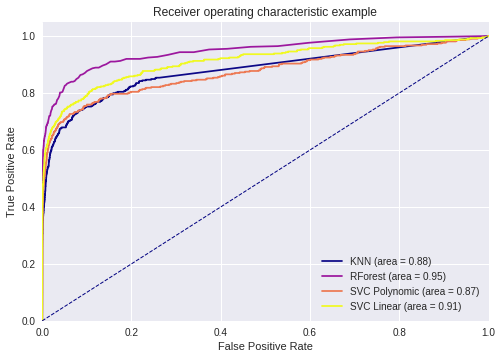

In [11]:
roc({"KNN": knn, "RForest": rf, 
     "SVC Linear": svc_linear,
     "SVC Polynomic": svc_poly})

----

In [12]:
%%html
<div style="background-color: #FFFF6F; color:#525200">
    <h2 style="padding: 10px; text-align:center">4. b261 Vs. All </h2>
</div>

### 4.1. SVM - Linear

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.92      0.57      0.71       297

avg / total       0.99      0.99      0.99     20297

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.87      0.57      0.69       308

avg / total       0.99      0.99      0.99     20308

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     20000
          3       0.89      0.42      0.57       424

avg / total       0.99      0.99      0.98     20424

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

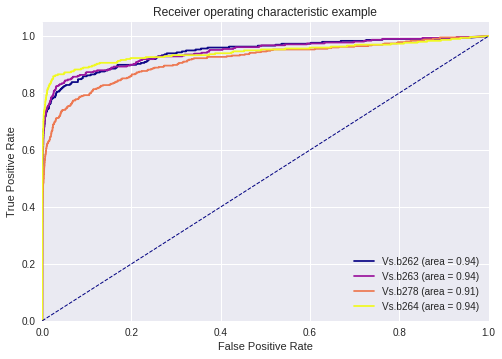

CPU times: user 45.8 s, sys: 116 ms, total: 45.9 s
Wall time: 45.9 s


In [13]:
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_linear("b261"))

### 4.2. SVM - Polynomic

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.92      0.47      0.62       297

avg / total       0.99      0.99      0.99     20297

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.92      0.48      0.63       308

avg / total       0.99      0.99      0.99     20308

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     20000
          3       0.93      0.30      0.46       424

avg / total       0.98      0.99      0.98     20424

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

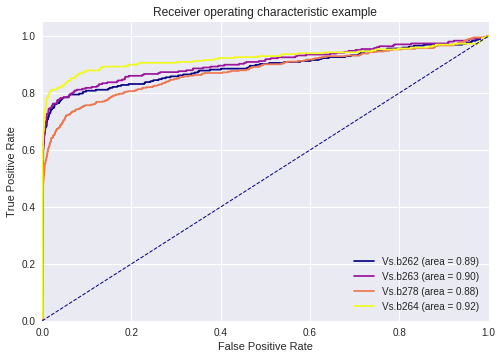

CPU times: user 38.4 s, sys: 156 ms, total: 38.5 s
Wall time: 38.4 s


In [14]:
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_poly("b261"))

### 4.3. Random Forest

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.98      0.45      0.61       297

avg / total       0.99      0.99      0.99     20297

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.97      0.51      0.67       308

avg / total       0.99      0.99      0.99     20308

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     20000
          3       0.99      0.31      0.47       424

avg / total       0.99      0.99      0.98     20424

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

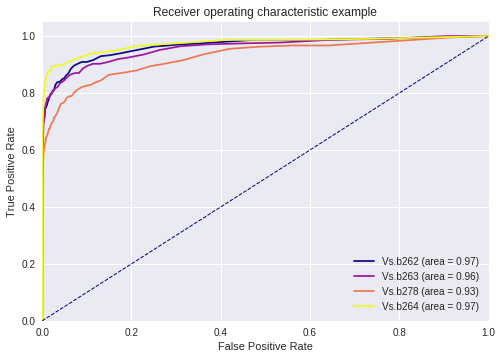

CPU times: user 3min 18s, sys: 182 ms, total: 3min 18s
Wall time: 3min 18s


In [15]:
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(rf("b261"))

### 4.4. KNN

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     20000
          3       0.89      0.36      0.51       297

avg / total       0.99      0.99      0.99     20297

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     20000
          3       0.87      0.34      0.49       308

avg / total       0.99      0.99      0.99     20308

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     20000
          3       0.94      0.28      0.43       424

avg / total       0.98      0.98      0.98     20424

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

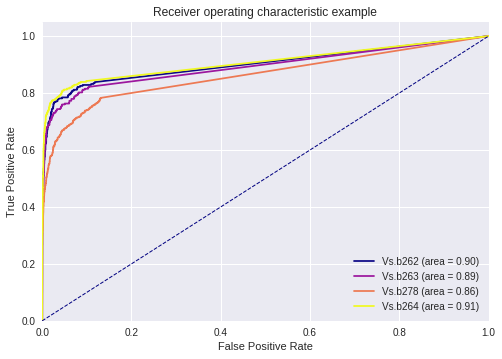

CPU times: user 10min 5s, sys: 214 ms, total: 10min 5s
Wall time: 10min 6s


In [16]:
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(knn("b261"))

In [17]:
%%html
<div style="background-color: #FFFF6F; color:#525200">
    <h2 style="padding: 10px; text-align:center">5. b278 Vs. All </h2>
</div>

### 5.1. SVM - Linear

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.91      0.57      0.70       297

avg / total       0.99      0.99      0.99     20297

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.86      0.56      0.68       308

avg / total       0.99      0.99      0.99     20308

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     20000
          3       0.91      0.61      0.73       222

avg / total       0.99      1.00      0.99     20222

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

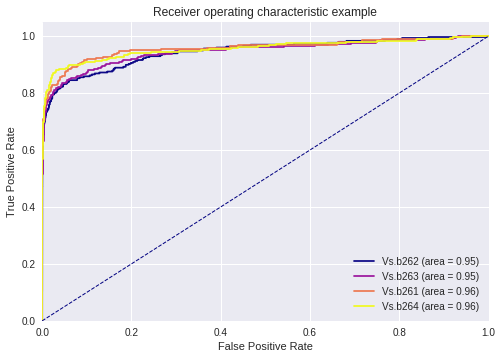

CPU times: user 1min 57s, sys: 260 ms, total: 1min 57s
Wall time: 1min 57s


In [18]:
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_linear("b278"))

### 5.2. SVM - Polynomic

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.86      0.54      0.66       297

avg / total       0.99      0.99      0.99     20297

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.83      0.52      0.64       308

avg / total       0.99      0.99      0.99     20308

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     20000
          3       0.85      0.56      0.68       222

avg / total       0.99      0.99      0.99     20222

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

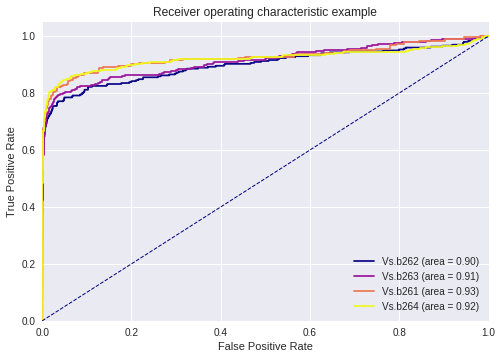

CPU times: user 1min 15s, sys: 124 ms, total: 1min 15s
Wall time: 1min 15s


In [19]:
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_poly("b278"))

### 5.3. Random Forest

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.97      0.49      0.65       297

avg / total       0.99      0.99      0.99     20297

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.92      0.52      0.67       308

avg / total       0.99      0.99      0.99     20308

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     20000
          3       0.93      0.64      0.75       222

avg / total       1.00      1.00      1.00     20222

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

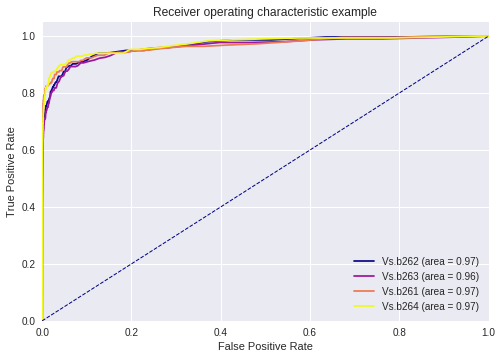

CPU times: user 4min 7s, sys: 229 ms, total: 4min 7s
Wall time: 4min 7s


In [20]:
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(rf("b278"))

### 5.4. KNN

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     20000
          3       0.82      0.41      0.55       297

avg / total       0.99      0.99      0.99     20297

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     20000
          3       0.75      0.41      0.53       308

avg / total       0.99      0.99      0.99     20308

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.77      0.47      0.59       222

avg / total       0.99      0.99      0.99     20222

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

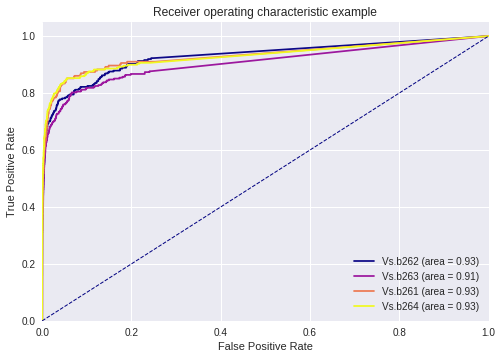

CPU times: user 10min 20s, sys: 165 ms, total: 10min 21s
Wall time: 10min 21s


In [21]:
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(knn("b278"))

In [22]:
%%html
<div style="background-color: #FFFF6F; color:#525200">
    <h2 style="padding: 10px; text-align:center">6. b278+b261 Vs. All </h2>
</div>

### 6.1. SVM - Linear

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.93      0.55      0.69       297

avg / total       0.99      0.99      0.99     20297

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.89      0.55      0.68       308

avg / total       0.99      0.99      0.99     20308

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.91      0.60      0.73       298

avg / total       0.99      0.99      0.99     20298

--------------------------------------------------------------------------------


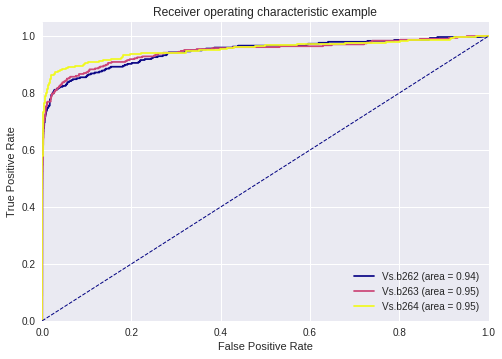

CPU times: user 4min 10s, sys: 1.24 s, total: 4min 12s
Wall time: 4min 12s


In [23]:
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_linear(["b278", "b261"]))

### 6.2. SVM - Polynomic

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.92      0.55      0.68       297

avg / total       0.99      0.99      0.99     20297

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.87      0.54      0.66       308

avg / total       0.99      0.99      0.99     20308

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.90      0.57      0.70       298

avg / total       0.99      0.99      0.99     20298

--------------------------------------------------------------------------------


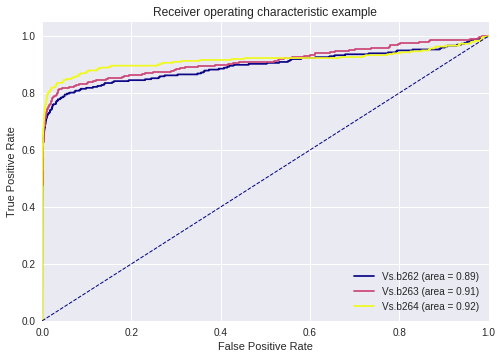

CPU times: user 2min 26s, sys: 1.21 s, total: 2min 27s
Wall time: 2min 27s


In [24]:
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_poly(["b278", "b261"]))

### 6.3. Random Forest

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.98      0.48      0.65       297

avg / total       0.99      0.99      0.99     20297

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.95      0.53      0.68       308

avg / total       0.99      0.99      0.99     20308

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.97      0.58      0.73       298

avg / total       0.99      0.99      0.99     20298

--------------------------------------------------------------------------------


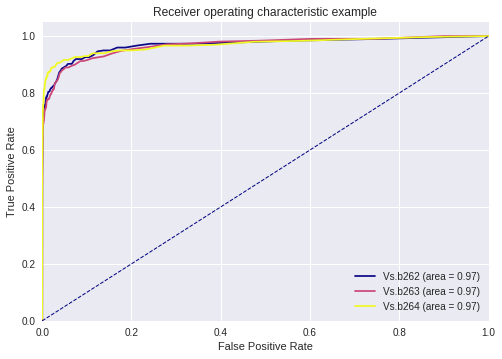

CPU times: user 6min 28s, sys: 216 ms, total: 6min 28s
Wall time: 6min 28s


In [25]:
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(rf(["b278", "b261"]))

### 6.4. KNN

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.86      0.42      0.56       297

avg / total       0.99      0.99      0.99     20297

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     20000
          3       0.80      0.42      0.55       308

avg / total       0.99      0.99      0.99     20308

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.89      0.46      0.61       298

avg / total       0.99      0.99      0.99     20298

--------------------------------------------------------------------------------


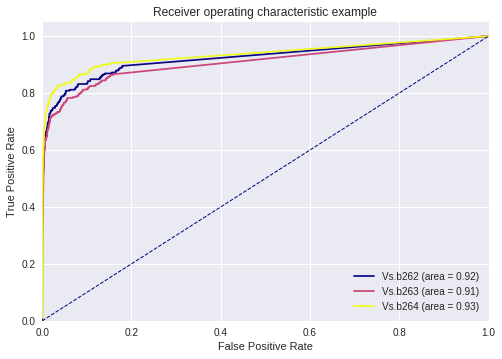

CPU times: user 15min 21s, sys: 332 ms, total: 15min 21s
Wall time: 15min 22s


In [26]:
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(knn(["b278", "b261"]))

In [27]:
%%html
<div style="background-color: #FFFF6F; color:#525200">
    <h2 style="padding: 10px; text-align:center">7. b278+b261+b264 Vs. All </h2>
</div>

### 7.1. SVM - Linear

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.94      0.56      0.70       297

avg / total       0.99      0.99      0.99     20297

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.89      0.57      0.69       308

avg / total       0.99      0.99      0.99     20308

--------------------------------------------------------------------------------


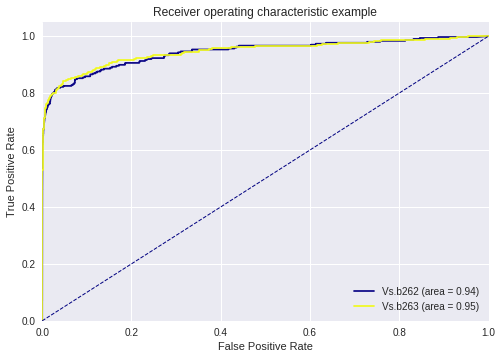

CPU times: user 6min 17s, sys: 1.21 s, total: 6min 18s
Wall time: 6min 18s


In [28]:
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_linear(["b278", "b261", "b264"]))

### 7.2. SVM - Polynomic

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.93      0.55      0.69       297

avg / total       0.99      0.99      0.99     20297

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.90      0.55      0.68       308

avg / total       0.99      0.99      0.99     20308

--------------------------------------------------------------------------------


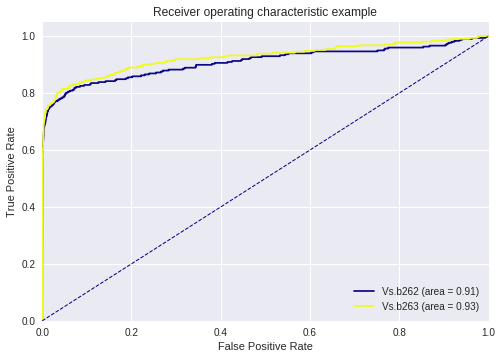

CPU times: user 3min 23s, sys: 1.04 s, total: 3min 24s
Wall time: 3min 24s


In [29]:
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_poly(["b278", "b261", "b264"]))

### 7.3. Random Forest

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.98      0.54      0.70       297

avg / total       0.99      0.99      0.99     20297

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.95      0.55      0.69       308

avg / total       0.99      0.99      0.99     20308

--------------------------------------------------------------------------------


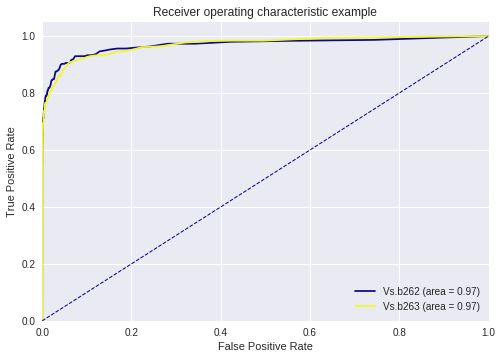

CPU times: user 7min 2s, sys: 168 ms, total: 7min 2s
Wall time: 7min 3s


In [30]:
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(rf(["b278", "b261", "b264"]))

### 7.4. KNN

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     20000
          3       0.88      0.46      0.60       297

avg / total       0.99      0.99      0.99     20297

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     20000
          3       0.80      0.47      0.59       308

avg / total       0.99      0.99      0.99     20308

--------------------------------------------------------------------------------


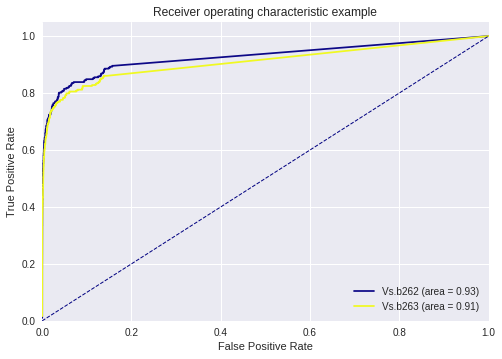

CPU times: user 14min 37s, sys: 316 ms, total: 14min 38s
Wall time: 14min 38s


In [31]:
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(knn(["b278", "b261", "b264"]))

In [32]:
print("Total Run Time: " + str(time.time() - start))
del start

Total Run Time: 6656.07122517
